# Classification

# STAT318/462 Lab3
## Logistic Regression, LDA, QDA and KNN
In this lab you will work through Section 4.6 of the course textbook, An Introduction to Statistical Learning (there is a link to this textbook on the Learn page). 

# The Stock Market Data
The first thing to do is to load the necessary package and briefly explore the data set called **Smarket**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
smarket = pd.read_csv("Smarket.csv") 
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [3]:
smarket.shape

(1250, 9)

The data set has 1250 rows (observations) and 9 columns (variables)

In [4]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
smarket["Direction"].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag3', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag4', ylabel='Year'>,
        <AxesSubplot:xlabel='Lag5', ylabel='Year'>,
        <AxesSubplot:xlabel='Volume', ylabel='Year'>,
        <AxesSubplot:xlabel='Today', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag3', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag4', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Lag5', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Volume', ylabel='Lag1'>,
        <AxesSubplot:xlabel='Today', ylabel='Lag1'>],
       [<AxesSubplot:xlabel='Year', ylabel='Lag2'>,
        <AxesSubplot:xlabel='Lag1', ylabel='Lag2'>,
        <AxesSubplot:xlabel='Lag2', ylabel='Lag2'>,
    

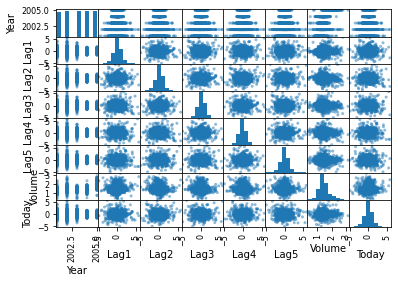

In [6]:
pd.plotting.scatter_matrix(smarket)

In [7]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


We can plot the **Volume** variable of the **Smarket** dataset.

Text(0.5, 0, 'Index')

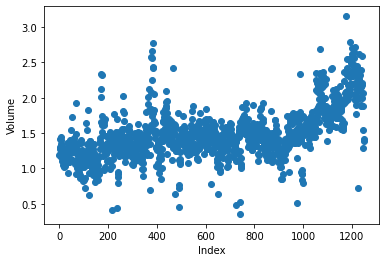

In [8]:
plt.scatter(range(1250), smarket["Volume"])
plt.ylabel("Volume")
plt.xlabel("Index")

How would you turn this plot into a line graph? Research this yourself.

# Logistic Regression - GLM

Logistic regression is a special case of **Generalised Linear Modelling (GLM)** using the Binomial distribution family.

The parameters to GLM are
    1. The model formula
    2. The data set
    3. The distribution family

In [9]:
from statsmodels.genmod.generalized_linear_model import GLM
glm_model = GLM.from_formula(formula="Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume", 
                 data=smarket, 
                 family=sm.families.Binomial()).fit()
glm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Fri, 07 May 2021   Deviance:                       1727.6
Time:                                          16:29:58   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

The summary gives a lot of useful information.

The glm “model” resides in the variable called ```glm_model```. This will be some kind of class that holds everything that is known about the model. This information can be hard to get at. statsmodels has a number of attributes for extracting the typical kinds of information that we frequently need. The ```.param``` is one of these.


In [10]:
glm_model.params

Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

In [11]:
glm_model.conf_int()

,0,1
Intercept,-0.345836,0.597836
Lag1,-0.025254,0.171401
Lag2,-0.055866,0.140469
Lag3,-0.108963,0.086793
Lag4,-0.107307,0.088589
Lag5,-0.107354,0.086728
Volume,-0.445822,0.174941


Suppose you want to use the model to predict the target variable Direction. Also let’s suppose we want the probability of this prediction (since it is a categorical prediction). ```.predict()``` runs prediction on the data we trained on when the prediction values are not included.

In [12]:
glm_probs = glm_model.predict()
glm_probs[0:10]

array([0.49291587, 0.51853212, 0.51886117, 0.48477764, 0.48921884,
       0.49304354, 0.50734913, 0.49077084, 0.48238647, 0.51116222])

Let’s remind ourselves how Direction is being portrayed in the data.

So probabilities < 0.5 are closer to 1 (Down) than 0 (Up)

Let’s create a vector that contains 1250 “Down” entries. Then replace the value with “Up” if the prediction probability is < 0.5

In [13]:
glm_pred = np.where(glm_probs < 0.5, "Up", "Down")
glm_pred

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

Rather than listing 1250 up/down values, we shall calculate the “confusion matrix”" using sklearn ```confusion_matrix()```. In this case we shall create a pair of vectors. The first representing the prediction, the second representing the actual.

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(smarket["Direction"], glm_pred)

array([[145, 457],
       [141, 507]], dtype=int64)

How accurate (as a ratio between 0 and 1) have we been? Accuracy is the leading diagonal (summed) divided by the total of all the cells

In [15]:
(145 + 507) / 1250

0.5216

Look at this short-cut way of achieving the same thing.

In [16]:
np.mean(glm_pred == smarket["Direction"])

0.5216

# Dividing up a data set
WE can divide up the dataset by slecting all the values before 200 in train ad after 2005 in test.

In [17]:
train = smarket[smarket["Year"] < 2005]
test = smarket[smarket["Year"] >= 2005]
train.shape, test.shape

((998, 9), (252, 9))

This results in two pandas datasets **train** and **test**.

Suppose we create a more flexible model (using all the predictors) BUT this time we restrict its training to data prior to 2005. We can use the subset parameter. We can repeat the analysis steps we used earlier.

In [18]:
glm_model = GLM.from_formula(formula="Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume", 
                 data=train, 
                 family=sm.families.Binomial()).fit()

glm_probs = glm_model.predict(test)
glm_pred = np.where(glm_probs < 0.5, "Up", "Down")

confusion_matrix(test["Direction"], glm_pred)

array([[77, 34],
       [97, 44]], dtype=int64)

We need to turn this confusion matrix into a single accuracy value.

In [19]:
np.mean(glm_pred == test["Direction"])

0.4801587301587302

This suggests that the model is 48% accurate on unseen data (i.e. rows from 2005 that were NOT used in the training)

In [20]:
np.mean(glm_pred != test["Direction"])

0.5198412698412699

This suggests that the model is wrong 52% of the time on unseen data.

Let’s repeat this whole process with a slightly less flexible model. We will model using predictors Lag1 & Lag2.

In [21]:
glm_model = GLM.from_formula(formula="Direction~Lag1+Lag2", 
                 data=train, 
                 family=sm.families.Binomial()).fit()

glm_probs = glm_model.predict(test)
glm_pred = np.where(glm_probs < 0.5, "Up", "Down")

confusion_matrix(test["Direction"], glm_pred)

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

Calculate the Accuracy on unseen data

In [22]:
np.mean(glm_pred == test["Direction"])

0.5595238095238095

Calculate the proportion of time we predict “Up” correctly. Note that this is a different calculation to Accuracy

In [23]:
106 / (106 + 76)

0.5824175824175825

Let’s create two new observations and predict the outcome

In [24]:
glm_model.predict(pd.DataFrame({
    "Lag1": [1.2, 1.5],
    "Lag2": [1.1, -0.8],
}))

0    0.520854
1    0.503906
dtype: float64

This predicts “Down” both times.

# Linear Discriminant Analysis - LDA
We are going to use the sklearn's ```LinearDiscriminantAnalysis``` to model Direction using Lag1 & Lag2

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

Let’s use our train/test division of the data set and generate an lda model on the train data. We can examine what named things are inside the model.

In [26]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(train[['Lag1','Lag2']], train['Direction'])

lda_model.priors_

array([0.49198397, 0.50801603])

Let’s look at the “class” aspect of the model:

In [27]:
lda_class = lda_model.predict(test[['Lag1','Lag2']])
confusion_matrix(lda_class, test["Direction"])

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

Calculate accuracy:

In [28]:
np.mean(lda_class == test["Direction"])

0.5595238095238095

# Quadratic Discriminant Analysis - QDA
We are going to use the sklearn's ```QuadraticDiscriminantAnalysis``` 

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [30]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(train[['Lag1','Lag2']], train['Direction'])

qda_model.priors_

array([0.49198397, 0.50801603])

In [31]:
qda_class = qda_model.predict(test[['Lag1','Lag2']])
confusion_matrix(qda_class, test["Direction"])

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [32]:
np.mean(qda_class == test["Direction"])

0.5992063492063492

The accuracy of the model on unseen data was 60%. This is looking better.

# K-Nearest Neighbors - KNN
We are going to use the sklearn's ```KNeighborsClassifier``` 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Next, let’s train the knn (using k=1) - we will make this reproducable by setting the random seed. We cans et k=1 by setting ```n_neighbors=1```

In [34]:
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(train[['Lag1','Lag2']], train['Direction'])

Let’s calculate its training accuracy

In [35]:
knn_class = knn_model.predict(test[['Lag1','Lag2']])
confusion_matrix(knn_class, test["Direction"])

array([[43, 58],
       [68, 83]], dtype=int64)

In [36]:
np.mean(knn_class == test["Direction"])

0.5

The accuracy is a mere 50%

Let’s change a meta parameter of the algorithm (k=3 this time) and try again.

In [37]:
np.random.seed(1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_model = knn3.fit(train[['Lag1','Lag2']], train['Direction'])

In [38]:
knn3_class = knn3_model.predict(test[['Lag1','Lag2']])
confusion_matrix(knn3_class, test["Direction"])

array([[48, 55],
       [63, 86]], dtype=int64)

In [39]:
np.mean(knn3_class == test["Direction"])

0.5317460317460317

Now we have an accuracy of 54%. Maybe further tweaking of the k parameter will produce an even better result.

# An Application to Caravan Insurance Data

In [40]:
caravan = pd.read_csv("Caravan.csv") 
caravan.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [41]:
caravan.shape

(5822, 86)

In [42]:
caravan["Purchase"].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [43]:
348 / 5822

0.05977327378907592

That is 6%. If we did no modelling except to always predict “No” we would be right 94% of the time!

Another problem with this data set is that the predictors have wildly different scales. In this situation it is good practice to subtract the column means and to then divide by the standard deviation. There is an sklearn function for doing this: scale().
Since the last column is a factor we shall exclude it from the scaling (as it has no meaning for factors).

In [44]:
from sklearn.preprocessing import scale
predictors = caravan.iloc[:, :-1]

# Note with scale we need to re create the pandas DataFrame
standardised_x = pd.DataFrame(scale(predictors), index=predictors.index, columns=predictors.columns)

In [45]:
np.var(caravan["MOSTYPE"])

165.0095001180681

In [46]:
np.var(caravan["MAANTHUI"])

0.16467949134763

In [47]:
np.var(standardised_x["MOSTYPE"])

1.0000000000000002

In [48]:
np.var(standardised_x["MAANTHUI"])

1.0

We shall set aside the first 1000 rows as a test set. This is rarely “best prectice” but lets not focus on the resampling strategy.

In [49]:
test_x = standardised_x[:1000]
train_x = standardised_x[1001:]

test_y = caravan["Purchase"][:1000]
train_y = caravan["Purchase"][1001:]

In [50]:
test_x.shape, train_x.shape

((1000, 85), (4821, 85))

Lets run a KNN model.

In [51]:
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(train_x, train_y)

Let’s assess the model using the test data

In [52]:
knn_pred = knn_model.predict(test_x)

In [53]:
np.mean(knn_pred != test_y)

0.118

Above is the error rate.

In [54]:
np.mean(test_y != "No")

0.059

Above is the proportion of “Yes” train cases

In [55]:
confusion_matrix(knn_pred, test_y)

array([[873,  50],
       [ 68,   9]], dtype=int64)

Above is the confusion matrix for this model (using test data)

The accuracy of the “yes” predictions can be calculated in the usual way:

In [56]:
9 / (68 + 9)

0.11688311688311688

Let’s repeat this with k=3

In [57]:
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(train_x, train_y)

knn_pred = knn_model.predict(test_x)
confusion_matrix(knn_pred, test_y)

array([[921,  54],
       [ 20,   5]], dtype=int64)

In [58]:
5 / 26

0.19230769230769232

And again with k=5

In [59]:
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(train_x, train_y)

knn_pred = knn_model.predict(test_x)
confusion_matrix(knn_pred, test_y)

array([[931,  55],
       [ 10,   4]], dtype=int64)

In [60]:
4 / 14

0.2857142857142857

The **knn** model predicts “Yes” correctly 29% of the time.

Shall we try logistic regression?

In [61]:
test = caravan[:1000]
train = caravan[1001:]

formula = "Purchase ~" + " + ".join(set(caravan.columns) - {"Purchase"})
glm_model = GLM.from_formula(formula=formula, data=train, family=sm.families.Binomial()).fit()

Let’s use a threshold of 50%

In [62]:
glm_probs = glm_model.predict(test)
glm_pred = np.where(glm_probs < 0.5, "Yes", "No")

confusion_matrix(test["Purchase"], glm_pred)

array([[934,   7],
       [ 59,   0]], dtype=int64)

In [63]:
glm_pred = np.where(glm_probs < 0.75, "Yes", "No")

confusion_matrix(test["Purchase"], glm_pred)

array([[919,  22],
       [ 48,  11]], dtype=int64)

The **glm** model predicts “Yes” correctly 33% of the time.

In [64]:
11 / (22 + 11)

0.3333333333333333